In [95]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import model_selection, linear_model

%matplotlib inline

# 1. Read and load data

In [35]:
url = 'https://raw.githubusercontent.com/Kushal997-das/THE-SPARKS-FOUNDATION/master/Prediction%20using%20Supervised%20ML/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)

# 2. Show first and last 5 rows

In [24]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [25]:
df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# 3. Check shape of data

In [12]:
df.shape

(25, 2)

In [13]:
# 25 rows, 2 columns a.k.a. 25 entries, 2 attributes

# 4. Check for null values

In [14]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [16]:
# No null values

# 5. Summary of dataset

In [20]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [22]:
df.count()

Hours     25
Scores    25
dtype: int64

# 6. Group the data using score and hours, then Using bar chart ,plot score vs hours. The next phase is to enter distribution scores and plot them according to the requirement, here we are going to enter the title, x_label, and y_label, and show it according to the desired result.


In [50]:
# df1 = df[['Scores', 'Hours']]
df_grouped = df.groupby(by=['Scores']).count()
df_grouped

,Hours
Scores,
17,1
20,1
21,1
24,1
25,1
27,1
30,3
35,1
41,1


C:\Users\Josemaria\AppData\Local\Temp\ipykernel_10384\2557554694.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


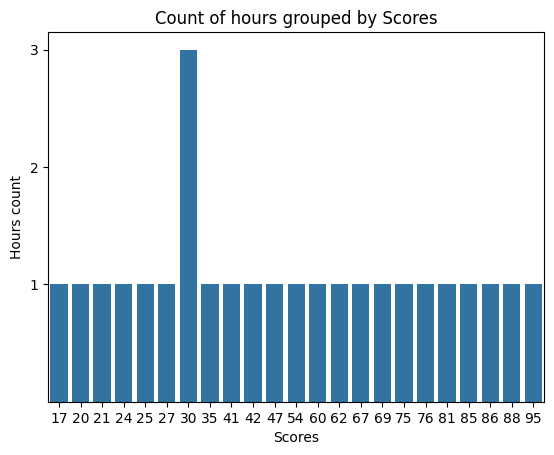

In [78]:
fig, ax = plt.subplots()
ax.set_title('Count of hours grouped by Scores')
ax.set_xlabel('Scores')
ax.set_ylabel('Hours count')
ax.set_yticks([1, 2, 3])
sn.barplot(data=df_grouped, x='Scores', y='Hours', ax=ax)
fig.show()

# 7. Visualize distribution of data using scatter plot


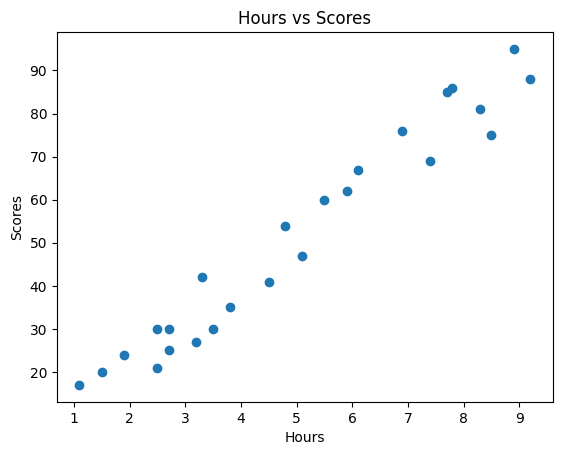

In [72]:
ax = plt.subplot()
ax.set_xlabel('Hours')
ax.set_ylabel('Scores')
ax.set_title('Hours vs Scores')
ax.scatter(data=df, x='Hours', y='Scores')

# 8. Prepare the data by splitting it into Training and Test set

In [89]:
train_set, test_set = model_selection.train_test_split(df, test_size=0.3)

In [90]:
train_set

,Hours,Scores
16,2.5,30
6,9.2,88
0,2.5,21
23,6.9,76
5,1.5,20
9,2.7,25
13,3.3,42
18,6.1,67
2,3.2,27
7,5.5,60


In [108]:
test_set

,Hours,Scores
17,1.9,24
15,8.9,95
24,7.8,86
1,5.1,47
3,8.5,75
22,3.8,35
19,7.4,69
8,8.3,81


# 9. Plot the regression line

<Axes: xlabel='Hours', ylabel='Scores'>

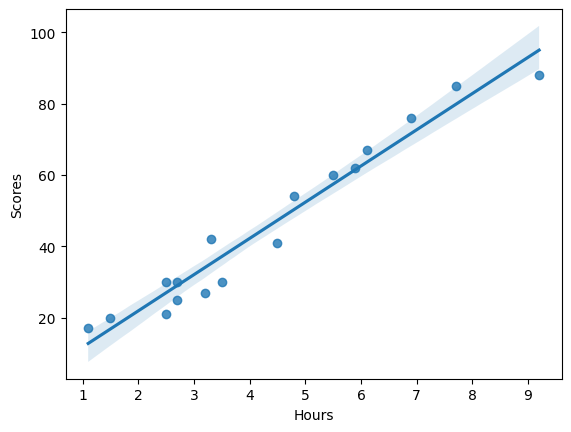

In [123]:
sn.regplot(data=train_set, x='Hours', y='Scores')

# 10. Plot the training and test data . Predict the score and compare predicted and actual score


In [99]:
lreg = linear_model.LinearRegression()

In [120]:
fitted = lreg.fit(X=train_set['Hours'].to_frame(), y=train_set['Scores'])

In [173]:
yhat = fitted.predict(test_set['Hours'].to_frame())

In [186]:
delta_y = list(zip(test_set['Scores'], yhat))

In [187]:
delta_y

[(24, 20.92980476727745),
 (95, 91.97951984461363),
 (86, 80.81456461817507),
 (47, 53.40967451691684),
 (75, 87.9195361259087),
 (35, 40.21472743112584),
 (69, 76.75458089947017),
 (81, 85.88954426655624)]

C:\Users\Josemaria\AppData\Local\Temp\ipykernel_10384\2926115120.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


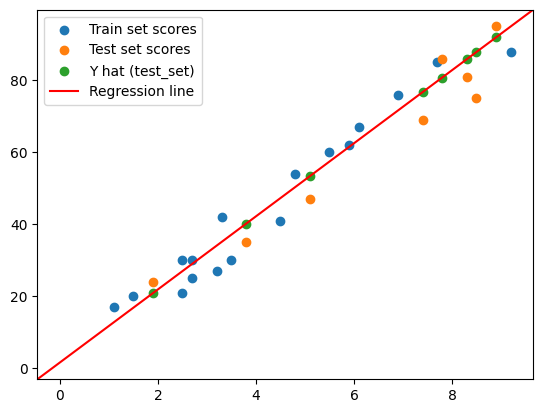

In [188]:
fig, ax = plt.subplots()
ax.scatter(x='Hours', y='Scores', data=train_set)
ax.scatter(x='Hours', y='Scores', data=test_set)
ax.scatter(x=test_set['Hours'], y=yhat)
ax.axline(xy1=(0, fitted.intercept_), slope=fitted.coef_[0], color='r')
ax.legend(labels=['Train set scores', 'Test set scores', 'Y hat (test_set)','Regression line',])
fig.show()

C:\Users\Josemaria\AppData\Local\Temp\ipykernel_10384\349255578.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


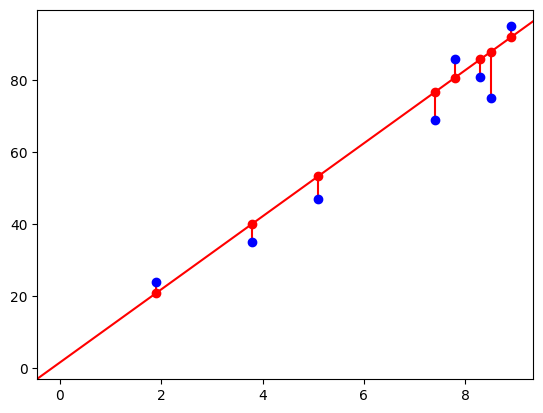

In [216]:
fig, ax = plt.subplots()
for idx, (y_test, y_hat) in enumerate(delta_y):
    x = test_set['Hours'].iloc[idx]
    ax.plot([x, x], [y_test, y_hat], color='r')
#     ax.text(x, y_hat-16, 'test')
    ax.plot(x, y_test, 'bo')
    ax.plot(x, y_hat, 'ro')
# ax.scatter(x='Hours', y='Scores', data=train_set)
ax.axline(xy1=(0, fitted.intercept_), slope=fitted.coef_[0], color='r')
# ax.legend(labels=['Train set scores', 'Test set scores', 'Y hat (test_set)','Regression line',])
fig.show()

In [235]:
test_set['Scores'] - yhat

17     3.070195
15     3.020480
24     5.185435
1     -6.409675
3    -12.919536
22    -5.214727
19    -7.754581
8     -4.889544
Name: Scores, dtype: float64

In [234]:
fitted.score(test_set['Hours'].to_frame(), test_set['Scores'])

0.9208956549677555

# 11. Predict accuracy using r2square

Since R^2 ~= 0.92, then the model appears to be pretty accurate.

# 12. Predict the percentage grade of a student if study hours are 9.25


In [240]:
fitted.predict(np.array([9.25]).reshape(-1, 1))

C:\Users\Josemaria\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([95.5320056])

An student that studies for 9.25 hours is expected to achieve a 95.532% score.

# 13. Evaluate the model: Calculate Mean absolute error, mean squared error, root mean squared error


Mean absolute error (MAE):

In [249]:
sklearn.metrics.mean_absolute_error(test_set['Scores'], yhat)

6.058021751238956

Mean squared error (MSE):

In [250]:
sklearn.metrics.mean_squared_error(test_set['Scores'], yhat)

45.58387882483089

Root mean squared error (RMSE):

In [251]:
# MSE = RMSE ** 2 or RMSE = sqrt(MSE)
sklearn.metrics.mean_squared_error(test_set['Scores'], yhat, squared=False)

6.751583430931658

# 14. Import seaborn and plot the distribution as well

C:\Users\Josemaria\AppData\Local\Temp\ipykernel_10384\3940309904.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(a=test_set['Scores'], hist=False, color='b', label='Actual scores', ax=ax)
C:\Users\Josemaria\AppData\Local\Temp\ipykernel_10384\3940309904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

Text(0.5, 1.0, 'Actual vs Predicted Scores distribution plots')

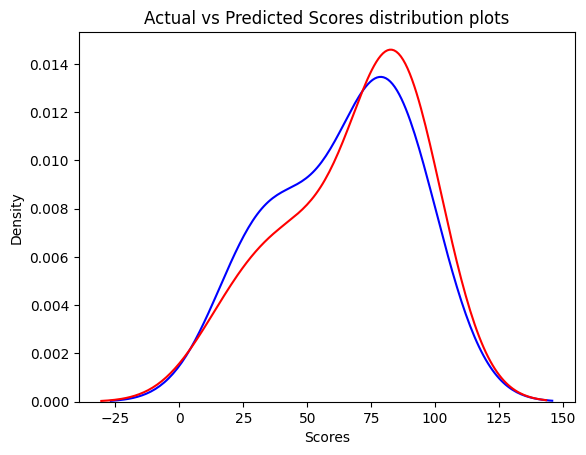

In [259]:
ax = plt.subplot()
sn.distplot(a=test_set['Scores'], hist=False, color='b', label='Actual scores', ax=ax)
sn.distplot(a=yhat, hist=False, color='r', label='Predicted scores', ax=ax)
ax.set_title('Actual vs Predicted Scores distribution plots')

# 15. Print actual vs predicted percentage score

In [ ]:
for actual_val, predicted_val in zip(test_set['Scores'], yhat):
    print(f'Actual score value: {actual_val} -> Predicted value: {pr}')